<a href="https://colab.research.google.com/github/St4rLighr/colab_notebook/blob/colabss/Instagram_likes_prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 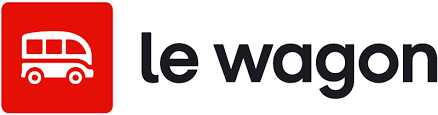

# Instagram likes prediction

In this challenge, we'll be taking Linear Regression further by seeing if we can predict some metrics from social media!

Let's get started!

## Data Exploration

a) Download the [dataset](https://drive.google.com/file/d/1O8ey3uytjqzRUQXTnmXkiqGBoa6lne1C/view?usp=sharing) and upload it to Google Colab. Execute the cell below to load data in a `posts` dataframe. One row of this dataset represents an Instagram post. Pay attention to the compression format of the file!

In [ ]:
# imports to use
import pandas as pd
import plotly.express as px

In [ ]:
# your code here
posts_df = pd.read_csv('posts.csv')
posts_df

,id,followers,comments,posts,likes,ts
0,6e56f910,1804,2,851,73,2017-10-08 16:21:28
1,0bea9208,542,1,846,7,2017-07-07 11:58:18
2,88ec6c3f,669,2,1495,33,2018-03-19 17:22:29
3,006b0d03,757,9,144,166,2018-09-02 18:49:52
4,c8a0f2a6,539,4,453,71,2018-04-18 14:15:36
...,...,...,...,...,...,...
2260897,f58b19ab,1847,14,678,166,2018-09-10 15:02:43
2260898,58433abf,237,1,192,31,2018-10-13 10:02:59
2260899,10c4b02c,267,2,110,35,2018-09-18 22:42:03
2260900,0f7064e1,214,3,53,50,2018-11-01 11:32:57


In [ ]:
# your code here
# y = likes
# x = followers, comments, posts

b) Column `id` designates the author. How many **unique** authors do we have ?

In [ ]:
# your code here
#posts_df.id.unique()
posts_df.id.nunique()

9298

c) Sort `df_posts` by **ascending date**.

In [ ]:
# your code here
posts_df_sorted = posts_df.sort_values(by='ts',ascending=True)

d) This dataset contains several posts for the same author.

By using the pandas function `drop_duplicates()` with parameter `keep=last`, **keep only the last post** made by each author.

This should leave you with a dataframe with as many rows as unique authors!

In [ ]:
# your code here
posts_df_sorted.drop_duplicates(keep='last')

,id,followers,comments,posts,likes,ts
651352,8fd5eb8f,560,1,1270,8,2015-01-01 00:00:03
1066195,e118b32e,711,0,646,23,2015-01-01 00:00:37
1275101,c2c2c06e,1703,0,811,18,2015-01-01 00:03:10
404586,d15ab509,357,1,794,10,2015-01-01 00:04:01
1180122,9473b9d1,207,0,217,2,2015-01-01 00:04:18
...,...,...,...,...,...,...
1747502,bd90c5ec,840,1,120,107,2019-03-10 23:53:48
673328,2e246173,582,2,12,27,2019-03-10 23:53:54
1860496,b0817588,1751,0,704,23,2019-03-10 23:54:41
1883069,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42


e) Use Plotly to draw a scatter plot between likes and followers. Do you see any **correlation**?


In [ ]:
# your code here
# fig = px.scatter(posts_df_sorted, x="likes", y="followers")
# fig.show()

This visual correlation that we see will serve as the intuition for the modelling that we are about to do!

## Modeling

### Preprocessing

a) Isolate the target and the feature!

For our first model, we'll start with the feature being the number of followers. The target, as you already know, is the number of likes!

**Assign X and y appropriately!**

In [35]:
posts_df.describe()

,followers,comments,posts,likes
count,2.260902e+06,2.260902e+06,2.260902e+06,2.260902e+06
mean,8.724964e+02,1.934132e+00,6.732979e+02,4.809293e+01
std,4.896134e+02,3.169414e+00,4.920783e+02,4.019719e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.620000e+02,0.000000e+00,2.770000e+02,1.800000e+01
50%,8.010000e+02,1.000000e+00,5.440000e+02,3.600000e+01
75%,1.228000e+03,3.000000e+00,9.760000e+02,6.600000e+01
max,1.999000e+03,3.900000e+01,1.998000e+03,1.990000e+02


In [19]:
# your code here
# Features
X = posts_df[['followers']] #X is always a df

# target
y = posts_df['likes'] #y is always a series

b) Remember what we said about the importance of separating data into train and test splits?

Split X and y, **80% for training and 20% for testing** into appropriately named variables - X_train, X_test, y_train and y_test.

Don't make your life difficult, use the `train_test_split` function!

In [20]:
# your code here
from sklearn.model_selection import train_test_split

# 80 / 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

c) Now we need to normalize! I know you're excited to apply your new modelling skills, but we first need to make sure the data is scaled!

Scale X_train and X_test - remember to only fit the scaler on X_train and to transform X_train and X_test!

In [21]:
# your code here
#scalers transform the result into an np array. We can use set_output (transform = 'pandas) or pd.DataFrame to transform them
#back into df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform = "pandas")

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

,followers
790946,0.551854
1114144,0.705015
1989331,-1.386140
654864,-0.473302
1911153,-0.606041
...,...
732180,1.007252
110268,1.413639
1692743,0.896976
2229084,0.010686


In [22]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

,followers
819131,-0.060789
1323268,-0.205781
246269,1.031758
2195310,1.887416
647276,0.200605
...,...
1663639,1.820025
344635,-0.209865
1313584,0.024981
237894,0.731563


### Linear Regression

d) Train a Linear Regression model that predicts likes (our y) based on followers (our X)! Remember to only train it on our **scaled training set**, not on our test set!

In [23]:
# your code here
from sklearn.linear_model import LinearRegression

# We TRAIN our model on X_train_scaled
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

### Evaluation

e) What is the R2 score on the train data? What is the MSE (mean squared error)? What about the MAE (mean absolute error)?

Do you think our model is performing well?

<details>
<summary><i>Hint</i></summary>
    ⟿  Use `mean_squared_error` and `mean_absolute_error` of module `sklearn.metrics`.
</details>

In [ ]:
#we check our coef and intercept
# alphas = model.coef_
# alphas

In [ ]:
# beta = model.intercept_
# beta

In [25]:
# your code here
#R2 score train
R2_train = model.score(X_train_scaled, y_train)
R2_train

0.1330744619469425

R2 is close to 0, so the model doesn't look very good.
MSE is quite difficult to interpret, but MAE is much simpler. Our model has an error of 32 likes on average.

f) It's time to evaluate our model on test data!

Use your model to predict likes for test data and store the predictions in 'pred_model_1'.

In [36]:
#predicting likes based on followers
# y_pred = model.predict(X_test_scaled)
pred_model_1 = model.predict(X_test_scaled)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, pred_model_1)
MAE

28.453116094940675

In [38]:
MSE = mean_squared_error(y_test, pred_model_1)
MSE

1397.5154706334465

In [30]:
# your code here
# new_pred = X_test_scaled.iloc[0:1,0]
# new_pred
# new_pred = pd.DataFrame({"followers" : [800]})
# new_pred

,followers
0,800


In [31]:
# new_pred_scaled = scaler.transform(new_pred)

In [32]:
# pred_model_1 = model.predict(new_pred_scaled)
# pred_model_1

array([45.93364102])

g) What is R2 score value on test data? What is the MSE (mean squared error)?

Do you think our model is a good one?

In [34]:
# your code here

Results are similar, our model is not really good. It was expected because with such simple model, you cannot get very accurate results.

h) We will try to add one feature to our model.

What does this code do?

In [40]:
# load data
archive = pd.read_csv('posts.csv')

# sort values by date
archive = archive.sort_values(by='ts', ascending=True)

# keep only most recent posts
most_recent_posts = archive.drop_duplicates('id', keep='last')

# keep from archive every posts except most recent
posts_wo_most_recent = archive[~archive.index.isin(most_recent_posts.index)]

# compute median of likes on previous posts
median_last_posts = posts_wo_most_recent.groupby('id', as_index=False)[['likes']].median()

# rename column likes by historical_likes
median_last_posts = median_last_posts.rename({'likes': 'historical_likes'}, axis=1)

# merge this colum to initial dataframe
df_posts_new = most_recent_posts.merge(median_last_posts, on="id")

i) Have a look at `df_posts_new` to understand what the previous code did!

In [41]:
# your code here
df_posts_new

,id,followers,comments,posts,likes,ts,historical_likes
0,c43f3233,1532,2,76,177,2016-03-26 20:15:50,146.0
1,38cc9619,1395,10,152,192,2016-04-01 14:53:58,187.0
2,58ce1b8d,582,1,80,32,2016-06-23 12:28:21,17.5
3,0dd11d6c,1566,0,57,150,2016-07-24 19:29:49,168.0
4,688eb92e,1675,1,159,166,2016-08-24 21:15:57,149.0
...,...,...,...,...,...,...,...
9242,bd90c5ec,840,1,120,107,2019-03-10 23:53:48,52.0
9243,2e246173,582,2,12,27,2019-03-10 23:53:54,108.5
9244,b0817588,1751,0,704,23,2019-03-10 23:54:41,26.0
9245,4bdf6fc3,1250,2,303,42,2019-03-10 23:57:42,44.0


j) Let's start all over, but now X is **followers and historical likes**.

Split X and y!

In [42]:
# your code here

# Features
X = df_posts_new[['followers','historical_likes']] #X is always a df

# target
y = df_posts_new['likes'] #y is always a series

k) Split into train and test split!

In [43]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

l) Scale!

In [44]:
# your code here
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

,followers,historical_likes
8209,1.117258,2.342487
48,0.441516,1.073584
9006,-0.574132,1.622629
1053,-0.576167,-0.805370
2894,0.968676,-0.878576
...,...,...
5734,0.030372,0.670951
5191,-1.268192,-0.732164
5390,2.191931,-0.366134
860,0.154529,0.390328


In [45]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

,followers,historical_likes
7507,0.435410,-0.341732
5786,0.561603,0.365926
1111,0.083292,0.512338
1662,1.530437,-0.488144
4159,1.056197,2.061864
...,...,...
1597,-0.228120,-1.256807
2881,-0.901826,-0.902978
8875,-0.362454,0.243916
68,0.557532,1.781242


m) Time to train a new model!

Train a new linear regression with our new `X_train_scaled`!

In [46]:
# your code here
model.fit(X_train_scaled, y_train)

LinearRegression()

i) Calculate R2, MSE and MAE on the test data. What do you think of this new model?

In [47]:
# your code here
y_pred = model.predict(X_test_scaled)

In [48]:
#R2 score test
R2_test = model.score(X_test_scaled, y_test)
R2_test

0.5571651369396615

In [49]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

23.405287123961582

In [50]:
MSE = mean_squared_error(y_test, y_pred)
MSE

1006.7056382659536

This model is better, with an average error of around 23 likes.
R2 is much better than the previous model.